In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#### q1
Apply scikit learn model for Simple Linear regression using SGD of the given Salary_Data.csv
dataset, and arrive at different values of B0, B1 and error for varying iterations. Plot the graph of
epoch(X-axis) versus error(Y-axis)

In [2]:
data = {
    "salary" : [1.7,2.4,2.3, 3.1, 3.7, 4.2, 4.4, 6.1, 5.4, 5.7, 6.4, 6.2],
    "experience" : [1.2, 1.5, 1.9, 2.2, 2.4, 2.5, 2.8, 3.1, 3.3, 3.7, 4.2, 4.4]
}
df = pd.DataFrame(data)
df
sal_df = df

In [3]:
x = np.array(df["salary"]).reshape(-1,1)
y = np.array(df["experience"]).reshape(-1,1)

In [4]:
model = LinearRegression()
model.fit(x, y)

print(model.coef_, model.intercept_)


[[0.57968648]] [0.27401481]


In [5]:
predictions = model.predict(x)

In [6]:
predictions

array([[1.25948182],
       [1.66526236],
       [1.60729371],
       [2.07104289],
       [2.41885478],
       [2.70869802],
       [2.82463531],
       [3.81010233],
       [3.40432179],
       [3.57822774],
       [3.98400827],
       [3.86807098]])

In [7]:
epochs = 400
alpha = 0.001
n = df.shape[0]
b0,b1=0,0

epoch = []
errors = []

for i in range(epochs):
    for j in range(n):
        xi = df["experience"][j]
        yi = df["salary"][j]
        
        pi = b0 + b1*xi
        
        err = pi - xi
        
        b0 = b0 - alpha*err
        b1 = b1 - b1*alpha*err*df["experience"]
        
        if j==n-1:
            print('EPOCH: ', i)
            predictions = b0 + b1*df["experience"]
            
            mse = np.sum((predictions - df["salary"]) ** 2)
            epoch.append(i)
            errors.append(mse)
    
print(epoch)
print(errors)
print(b0, b1)
        

EPOCH:  0
EPOCH:  1
EPOCH:  2
EPOCH:  3
EPOCH:  4
EPOCH:  5
EPOCH:  6
EPOCH:  7
EPOCH:  8
EPOCH:  9
EPOCH:  10
EPOCH:  11
EPOCH:  12
EPOCH:  13
EPOCH:  14
EPOCH:  15
EPOCH:  16
EPOCH:  17
EPOCH:  18
EPOCH:  19
EPOCH:  20
EPOCH:  21
EPOCH:  22
EPOCH:  23
EPOCH:  24
EPOCH:  25
EPOCH:  26
EPOCH:  27
EPOCH:  28
EPOCH:  29
EPOCH:  30
EPOCH:  31
EPOCH:  32
EPOCH:  33
EPOCH:  34
EPOCH:  35
EPOCH:  36
EPOCH:  37
EPOCH:  38
EPOCH:  39
EPOCH:  40
EPOCH:  41
EPOCH:  42
EPOCH:  43
EPOCH:  44
EPOCH:  45
EPOCH:  46
EPOCH:  47
EPOCH:  48
EPOCH:  49
EPOCH:  50
EPOCH:  51
EPOCH:  52
EPOCH:  53
EPOCH:  54
EPOCH:  55
EPOCH:  56
EPOCH:  57
EPOCH:  58
EPOCH:  59
EPOCH:  60
EPOCH:  61
EPOCH:  62
EPOCH:  63
EPOCH:  64
EPOCH:  65
EPOCH:  66
EPOCH:  67
EPOCH:  68
EPOCH:  69
EPOCH:  70
EPOCH:  71
EPOCH:  72
EPOCH:  73
EPOCH:  74
EPOCH:  75
EPOCH:  76
EPOCH:  77
EPOCH:  78
EPOCH:  79
EPOCH:  80
EPOCH:  81
EPOCH:  82
EPOCH:  83
EPOCH:  84
EPOCH:  85
EPOCH:  86
EPOCH:  87
EPOCH:  88
EPOCH:  89
EPOCH:  90
EPOCH:  9

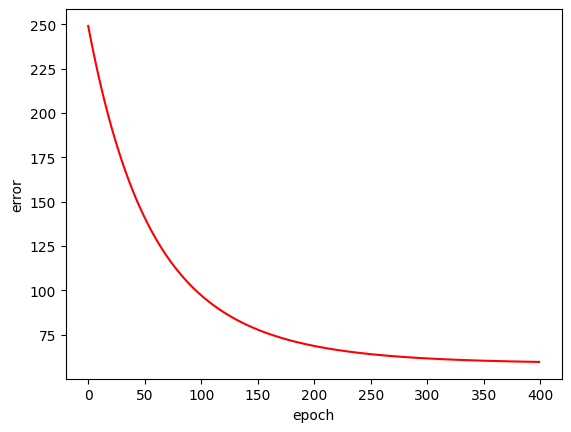

In [8]:
plt.plot(epoch, errors, 'r')
plt.xlabel("epoch")
plt.ylabel("error")
plt.show()

#### q2
Consider positive and negative slope dataset given below. Apply logistic regression with gradient
descent and illustrate the difference between slope values for both cases at different iterations. Plot the
graph of slope(x-axis) vs log-loss (y-axis) for both case separately.

x = np.array([1, 2, 3, 4, 5])
y = np.array([0, 0, 1, 1, 1]) # Positive slope

x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 1, 0, 0, 0]) # Negative slope

In [9]:
import numpy as np
import pandas as pd

# Create the positive DataFrame
x = np.array([1, 2, 3, 4, 5])
y = np.array([0, 0, 1, 1, 1])
pos_df = pd.DataFrame({"x": x, "y": y})

# Create the negative DataFrame
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 1, 0, 0, 0])
neg_df = pd.DataFrame({"x": x, "y": y})

print(pos_df)
print(neg_df)


   x  y
0  1  0
1  2  0
2  3  1
3  4  1
4  5  1
   x  y
0  1  1
1  2  1
2  3  0
3  4  0
4  5  0


pos_df : 

In [10]:
import numpy as np
import pandas as pd

# Initialize parameters
b0, b1 = 0, 0
alpha = 0.01
epochs = 4
iter_errors = []

# Sample data

df = pos_df

epoch_arr = []
log_loss_arr = []

# Training loop
for j in range(epochs):
    for i in range(df["x"].shape[0]):
        xi = df["x"][i]
        z = b0 + b1 * xi
        pi = 1.0 / (1 + np.exp(-z))  # Predicted probability

        yi = df["y"][i]
        error = yi - pi
        iter_errors.append(abs(error))

        # Update parameters using gradient descent
        b0 += alpha * error * pi * (1 - pi) * 1
        b1 += alpha * error * pi * (1 - pi) * xi
        
        # Print the error and updated parameters
        print("Error:", error)
        print("Updated b0, b1:", b0, b1)
    
    # Calculate and append log loss at the end of each epoch
    y_true = df["y"]
    y_pred = 1.0 / (1 + np.exp(-(b0 + b1 * df["x"])))
    log_loss = -np.mean(y_true * np.log(y_pred + 1e-15) + (1 - y_true) * np.log(1 - y_pred + 1e-15))
    epoch_arr.append(j)
    log_loss_arr.append(log_loss)

    print("Epoch", j, "Log Loss:", log_loss)

print("Final parameters: b0 =", b0, ", b1 =", b1)


Error: -0.5
Updated b0, b1: -0.00125 -0.00125
Error: -0.49906250109863126
Updated b0, b1: -0.002497651866465345 -0.0037453037329306903
Error: 0.503433336802797
Updated b0, b1: -0.0012391278681812901 3.0268261921474054e-05
Error: 0.5002795136760068
Updated b0, b1: 1.1570525150873335e-05 0.005033061835250128
Error: 0.49370611253277286
Updated b0, b1: 0.0012456402345844214 0.011203410382417869
Epoch 0 Log Loss: 0.6831227749911867
Error: -0.5031122224602966
Updated b0, b1: -1.2091590475461593e-05 0.009945678557357986
Error: -0.5049696527210386
Updated b0, b1: -0.0012743910076598143 0.00742107972298928
Error: 0.494752980581478
Updated b0, b1: -3.764476770193033e-05 0.011131318442862932
Error: 0.48887992671218716
Updated b0, b1: 0.0011839505195700584 0.016017699591950887
Error: 0.4796930642825835
Updated b0, b1: 0.0023812050621288532 0.02200397230474486
Epoch 1 Log Loss: 0.6738109674454525
Error: -0.5060959922695626
Updated b0, b1: 0.0011161531524028088 0.020738920395018817
Error: -0.5106468

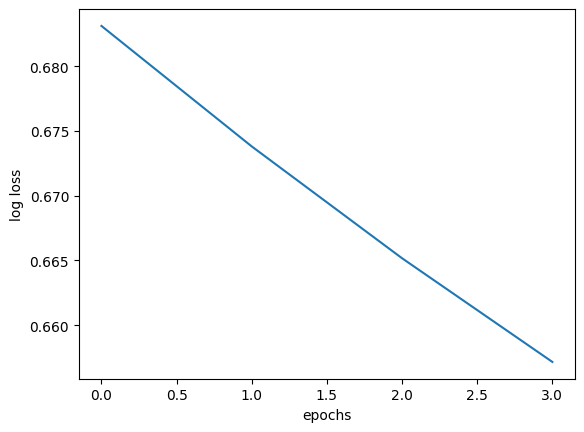

In [11]:
plt.plot(epoch_arr, log_loss_arr)
plt.xlabel("epochs")
plt.ylabel("log loss")
plt.show()

neg_df

In [12]:
import numpy as np
import pandas as pd

# Initialize parameters
b0, b1 = 0, 0
alpha = 0.01
epochs = 4
iter_errors = []

# Sample data

df = neg_df

epoch_arr = []
log_loss_arr = []

# Training loop
for j in range(epochs):
    for i in range(df["x"].shape[0]):
        xi = df["x"][i]
        z = b0 + b1 * xi
        pi = 1.0 / (1 + np.exp(-z))  # Predicted probability

        yi = df["y"][i]
        error = yi - pi
        iter_errors.append(abs(error))

        # Update parameters using gradient descent
        b0 += alpha * error * pi * (1 - pi) * 1
        b1 += alpha * error * pi * (1 - pi) * xi
        
        # Print the error and updated parameters
        print("Error:", error)
        print("Updated b0, b1:", b0, b1)
    
    # Calculate and append log loss at the end of each epoch
    y_true = df["y"]
    y_pred = 1.0 / (1 + np.exp(-(b0 + b1 * df["x"])))
    log_loss = -np.mean(y_true * np.log(y_pred + 1e-15) + (1 - y_true) * np.log(1 - y_pred + 1e-15))
    epoch_arr.append(j)
    log_loss_arr.append(log_loss)

    print("Epoch", j, "Log Loss:", log_loss)

print("Final parameters: b0 =", b0, ", b1 =", b1)

Error: 0.5
Updated b0, b1: 0.00125 0.00125
Error: 0.49906250109863126
Updated b0, b1: 0.002497651866465345 0.0037453037329306903
Error: -0.5034333368027969
Updated b0, b1: 0.0012391278681812903 -3.0268261921473187e-05
Error: -0.5002795136760068
Updated b0, b1: -1.1570525150873118e-05 -0.005033061835250127
Error: -0.493706112532773
Updated b0, b1: -0.0012456402345844217 -0.011203410382417869
Epoch 0 Log Loss: 0.6831227749911867
Error: 0.5031122224602966
Updated b0, b1: 1.2091590475461376e-05 -0.009945678557357986
Error: 0.5049696527210387
Updated b0, b1: 0.0012743910076598146 -0.007421079722989279
Error: -0.4947529805814781
Updated b0, b1: 3.764476770193033e-05 -0.011131318442862932
Error: -0.48887992671218716
Updated b0, b1: -0.0011839505195700587 -0.016017699591950887
Error: -0.47969306428258346
Updated b0, b1: -0.0023812050621288532 -0.02200397230474486
Epoch 1 Log Loss: 0.6738109674454525
Error: 0.5060959922695626
Updated b0, b1: -0.0011161531524028088 -0.020738920395018817
Error: 0

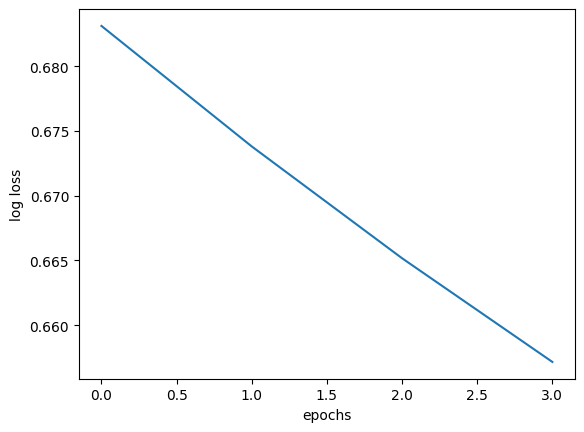

In [13]:
plt.plot(epoch_arr, log_loss_arr)
plt.xlabel("epochs")
plt.ylabel("log loss")
plt.show()

Create the following data set for Experience and Salary in CSV. Applying SLR, explore the relationship between
salary and experience with exerience in x-axis and salary in y axis.

a. Check for various values of beta (slope) = 0.1, 1.5, and 0.8 with a fixed value of intercept i.e b=1.1. Plot the graph between beta and mean squared error(MSE) for each case.

b. Try with beta between 0 to 1.5 with an increment of 0.01 keeping b (intercept) as constant and Plot the graph between beta and mean squared error(MSE).

c. Try with different values of intercept for slope beta between 0 to 1.5 with an increment of 0.01. Plot the graph between beta and mean squared error(MSE).

d. Use the scikit learn and compare the results of MSE.

In [14]:
#### a

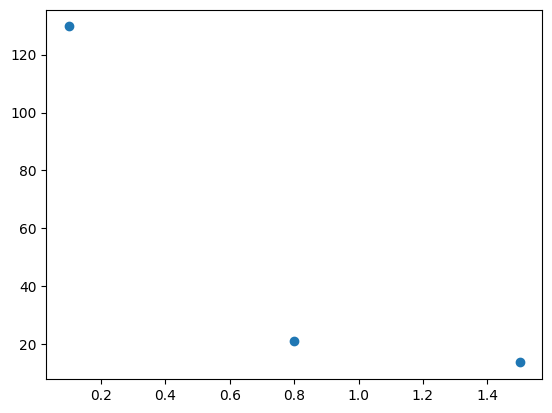

In [15]:
df = sal_df
b0 = 1.1 #given
b1_arr = [0.1,1.5,0.8]

mse_arr = []

for b1 in b1_arr:
    predictions = b0 + b1*df["experience"]
    mse = np.sum((predictions - df["salary"])**2)
    mse_arr.append(mse)

plt.scatter(b1_arr, mse_arr)
plt.show()
    

In [16]:
#### b

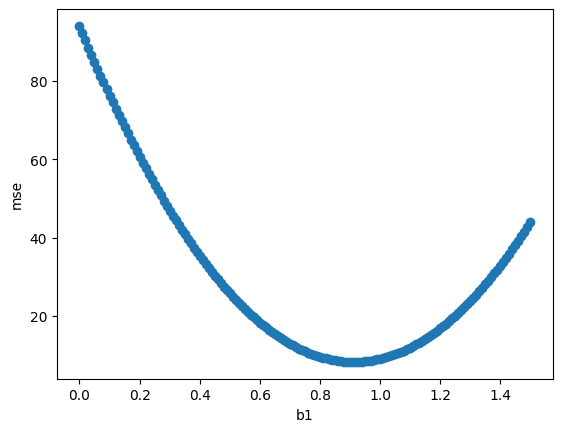

In [17]:
import numpy as np

# Generate values from 0 to 1.5 with a step size of 0.01
b1_arr = np.arange(0, 1.51, 0.01)  # Note: 1.51 is used to include 1.5 in the range
b0=2
mse_arr = []

for b1 in b1_arr:
    predictions = b0 + b1*df["experience"]
    mse = np.sum((predictions - df["salary"])**2)
    mse_arr.append(mse)

plt.scatter(b1_arr, mse_arr)
plt.xlabel("b1")
plt.ylabel("mse")
plt.show()

#### c ( same as b)
Try with different values of intercept for slope beta between 0 to 1.5 with an increment of 0.01. Plot the graph between
beta and mean squared error(MSE)

#### d Use the scikit learn and compare the results of MSE

In [18]:
data = {
    "time": [1,2,3,4,5,6,7,8],
    "pass": [0,0,0,0,1,1,1,1]
}

df = pd.DataFrame(data)

#### 4
Apply Stochastic Gradient Descent for the afore-mentioned dataset, and arrive at different values of B0, B1 and
error for 60 iterations of 5 epochs.

a. Plot the graph of log loss/error versus iteration.

b.Use the scikit learn and arrive at the results of B0, B1 and error, for 60 iterations of 5 epochs.

c. Plot the graph between beta (X-axis) and log loss/ error (Y-axis) using scikit learn and your approach separately.
d. Plot the separate graph of –log(x) ( y=1 case) and –log(1-x) (y=0 case) and also draw the combined graph of .bothcases

In [19]:
#### a

In [20]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Sample DataFrame
x = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Reshaping x for compatibility
y = np.array([0, 0, 1, 1, 1])
df = pd.DataFrame({"time": x.flatten(), "pass": y})

# Initialize Logistic Regression with parameters
# max_iter is set to 60 iterations
model = LogisticRegression(max_iter=60, solver='lbfgs')

# Fit the model to data
model.fit(x, y)

# Get the coefficients and intercept
B0 = model.intercept_[0]  # Intercept
B1 = model.coef_[0][0]    # Slope

# Predict probabilities for error calculation
y_pred = model.predict_proba(x)[:, 1]

# Calculate the error (log loss/error function)
error = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

print(f"B0 (Intercept): {B0}")
print(f"B1 (Slope): {B1}")
print(f"Error (Log Loss): {error}")


B0 (Intercept): -2.5337638504623134
B1 (Slope): 1.0469643175544174
Error (Log Loss): 0.27520281860432144


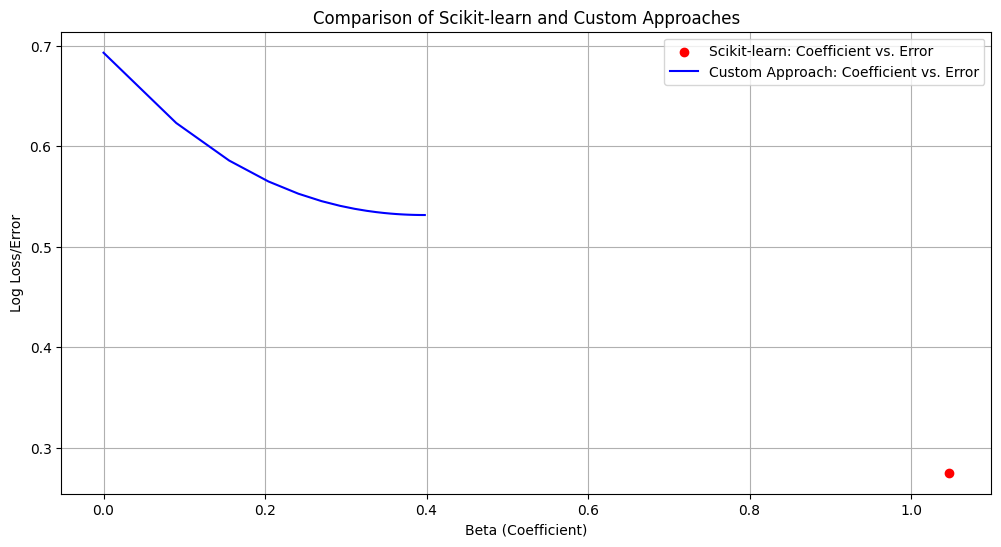

In [21]:
#q4  Plot the graph between beta (X-axis)  and log loss/ error (Y-axis)  using scikit learn and your approach separately.  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# Sample Data
x = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Reshaped x for compatibility
y = np.array([0, 0, 1, 1, 1])

# Initialize Logistic Regression model
model = LogisticRegression(max_iter=60, solver='lbfgs')

# Fit the model to data
model.fit(x, y)

# Predict probabilities and calculate log loss/error
predicted_probs = model.predict_proba(x)[:, 1]
error_sklearn = log_loss(y, predicted_probs)

# Store Scikit-learn coefficient
B1_sklearn = model.coef_[0][0]

# Gradient Descent Parameters for Custom Implementation
learning_rate = 0.1
iterations = 60
beta_values = []
errors_custom = []

# Initial guess for beta
beta_custom = 0.0

# Gradient Descent Implementation
for _ in range(iterations):
    # Calculate predictions
    preds = 1 / (1 + np.exp(-beta_custom * x.flatten()))
    
    # Calculate log loss/error
    error = log_loss(y, preds)
    
    # Store beta and error
    beta_values.append(beta_custom)
    errors_custom.append(error)
    
    # Gradient update
    gradient = np.dot((preds - y), x.flatten()) / len(y)
    beta_custom -= learning_rate * gradient

# Plotting
plt.figure(figsize=(12, 6))

# Plot Scikit-learn approach
plt.scatter([B1_sklearn], [error_sklearn], color='red', label='Scikit-learn: Coefficient vs. Error')

# Plot Custom Gradient Descent approach
plt.plot(beta_values, errors_custom, label='Custom Approach: Coefficient vs. Error', color='blue')

plt.xlabel('Beta (Coefficient)')
plt.ylabel('Log Loss/Error')
plt.title('Comparison of Scikit-learn and Custom Approaches')
plt.legend()
plt.grid(True)
plt.show()


In [22]:
import numpy as np
import pandas as pd

# Initialize parameters
b0, b1 = 0, 0
alpha = 0.01
epochs = 5
iter_errors = []
log_loss_arr = []
epoch_arr = []

 
# Training loop
for epoch in range(epochs):
    for i in range(df["pass"].shape[0]):
        xi = df["time"][i]
        z = b0 + b1 * xi
        pi = 1.0 / (1 + np.exp(-z))  # Predicted probability

        yi = df["pass"][i]
        error = yi - pi
        iter_errors.append(abs(error))
        
        # Update parameters using gradient descent
        b0 += alpha * error * pi * (1 - pi) * 1
        b1 += alpha * error * pi * (1 - pi) * xi

    # Calculate log loss at the end of each epoch
    y_true = df["pass"].values
    y_pred = 1.0 / (1 + np.exp(-(b0 + b1 * df["time"].values)))
    log_loss = -np.mean(y_true * np.log(y_pred + 1e-15) + (1 - y_true) * np.log(1 - y_pred + 1e-15))
    epoch_arr.append(epoch)
    log_loss_arr.append(log_loss)
    
    print(f"Epoch {epoch}: Log Loss = {log_loss}")

print("Final parameters: b0 =", b0, ", b1 =", b1)


Epoch 0: Log Loss = 0.6831227749911867
Epoch 1: Log Loss = 0.6738109674454525
Epoch 2: Log Loss = 0.6651700686127432
Epoch 3: Log Loss = 0.6571575863706118
Epoch 4: Log Loss = 0.6497311445496404
Final parameters: b0 = 0.005143401572145189 , b1 = 0.0520205218124939


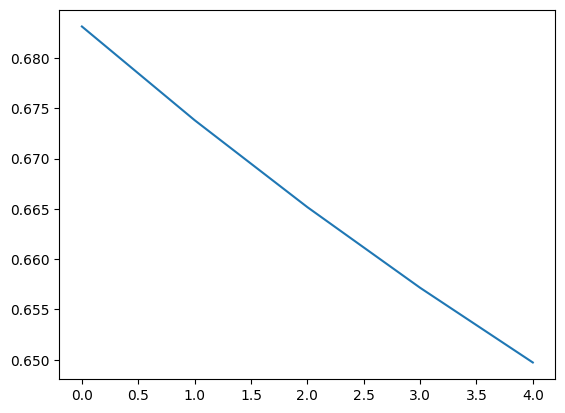

In [23]:
plt.plot(log_loss_arr)

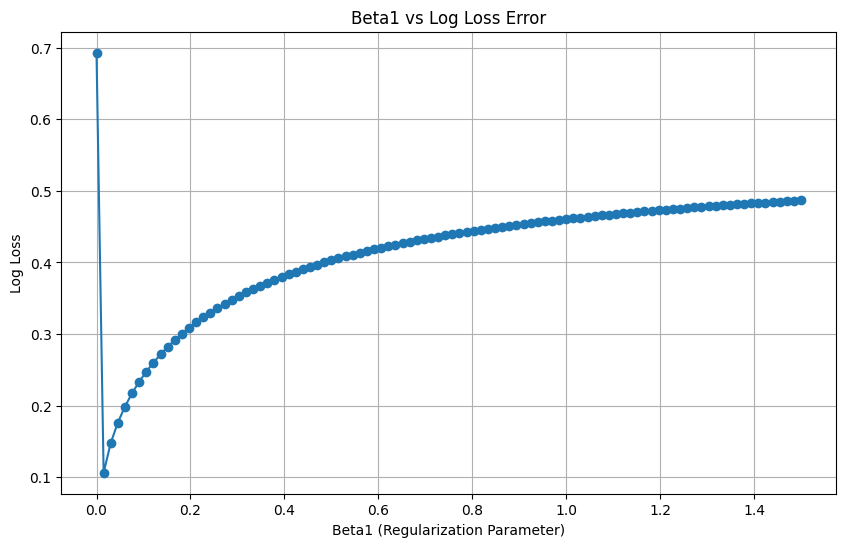

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

# Generate sample data
x = np.array([1, 2, 3, 4, 5])
y = np.array([0, 0, 1, 1, 1])
df = pd.DataFrame({"time": x, "pass": y})

# Prepare data for scikit-learn
X = df[['time']]
y = df['pass']

# Define range of beta1 values
beta1_values = np.linspace(0, 1.5, 100)
log_loss_arr = []

for beta1 in beta1_values:
    # Train a logistic regression model with the current beta1
    model = LogisticRegression(solver='liblinear', C=1/beta1 if beta1 != 0 else 1e-10)  # Note: C is the inverse of regularization strength
    model.fit(X, y)
    
    # Predict probabilities
    y_pred = model.predict_proba(X)[:, 1]
    
    # Calculate log loss
    loss = log_loss(y, y_pred)
    log_loss_arr.append(loss)

# Plot beta1 vs. log loss
plt.figure(figsize=(10, 6))
plt.plot(beta1_values, log_loss_arr, marker='o')
plt.xlabel('Beta1 (Regularization Parameter)')
plt.ylabel('Log Loss')
plt.title('Beta1 vs Log Loss Error')
plt.grid(True)
plt.show()


#### d
Plot the separate graph of –log(x) ( y=1 case) and –log(1-x) (y=0 case) and also draw the combined graph of .both
cases.

#### Use hours vs Fail/ Pass Data from previos lab for this quesitrons

#### 5
Consider positive and negative slope dataset given below. Apply simple linear regression with gradient descent
and illustrate the difference between slope values for both cases at different iterations. Plot the graph of slope(x-
axis) vs MSE (y-axis) for both case separately.

x = np.array([1, 2, 4, 3, 5])

y = np.array([1, 3, 3, 2, 5]) # Positive slope

x = np.array([1, 2, 3, 4, 5])

y = np.array([10, 8, 6, 4, 2]) # Negative slope

In [25]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([0, 0, 1, 1, 1])
pos_df = pd.DataFrame({"x": x, "y": y})
x = np.array([1, 2, 3, 4, 5])
y = np.array([10, 8, 6, 4, 2])
neg_df = pd.DataFrame({"x": x, "y": y})

In [26]:
#performing gradient descent
df = pos_df

b0, b1 = 0, 0
alpha = 0.0001

epoch_error = []
slope_arr = []
mse_arr = []

#stochastic (example by example)
epocs = 4
for _ in range(epocs):
    for i in range(df.shape[0]):
        xi = df["x"][i]
        #pi = b0 + b1*xi
        pi = b0 + b1*xi
        yi = df["y"][i]
        error = pi-yi
        epoch_error.append(abs(error))
        b0 = b0 - alpha*error
        b1 = b1 - alpha*error*xi
        slope_arr.append(b1)
        print(error)
        print("updated b0, b1: ", b0, b1)
        if i == df.shape[0]-1:
            prediction = b0 + b1*df["x"]
            mse = np.sum(((prediction - df["y"])**2) / df.shape[0])
            # print(mse)
            mse_arr.append(mse)
            rmse = mse**0.5

            print("mse: ", mse)
            print("rmse: ", rmse)
            
        # print(b0, b1)

prediction = b0 + b1*df["x"]
print(prediction)

0
updated b0, b1:  0.0 0.0
0.0
updated b0, b1:  0.0 0.0
-1.0
updated b0, b1:  0.0001 0.00030000000000000003
-0.9987
updated b0, b1:  0.00019987 0.00069948
-0.99630273
updated b0, b1:  0.000299500273 0.001197631365
mse:  0.5939099884960888
rmse:  0.7706555576235655
0.0014971316380000001
updated b0, b1:  0.0002993505598362 0.0011974816518362
0.0026943138635086
updated b0, b1:  0.00029908112844984915 0.0011969427890634982
-0.9961100905043596
updated b0, b1:  0.0003986921375002851 0.0014957758162148062
-0.9936182045976405
updated b0, b1:  0.0004980539579600492 0.0018932230980538624
-0.9900358305517707
updated b0, b1:  0.0005970575410152263 0.002388241013329748
mse:  0.5878916267148621
rmse:  0.7667409123784005
0.0029852985543449744
updated b0, b1:  0.0005967590111597918 0.0023879424834743136
0.005372643978108419
updated b0, b1:  0.000596221746761981 0.002386867954678692
-0.992243174389202
updated b0, b1:  0.0006954460642009012 0.0026845409069954527
-0.9885663903078172
updated b0, b1:  0.00

In [27]:
#performing gradient descent
df = neg_df

b0, b1 = 0, 0
alpha = 0.0001

epoch_error = []
neg_slope_arr = []
neg_mse_err = []

#stochastic (example by example)
epocs = 4
for _ in range(epocs):
    for i in range(df.shape[0]):
        xi = df["x"][i]
        #pi = b0 + b1*xi
        pi = b0 + b1*xi
        yi = df["y"][i]
        error = pi-yi
        epoch_error.append(abs(error))
        b0 = b0 - alpha*error
        b1 = b1 - alpha*error*xi
        neg_slope_arr.append(b1)
        print(error)
        print("updated b0, b1: ", b0, b1)
        if i == df.shape[0]-1:
            prediction = b0 + b1*df["x"]
            mse = np.sum(((prediction - df["y"])**2) / df.shape[0])
            # print(mse)
            mse_arr.append(mse)
            rmse = mse**0.5

            print("mse: ", mse)
            print("rmse: ", rmse)
            
        # print(b0, b1)

prediction = b0 + b1*df["x"]
print(prediction)

-10
updated b0, b1:  0.001 0.001
-7.997
updated b0, b1:  0.0017997 0.0025994
-5.9904021
updated b0, b1:  0.00239874021 0.00439652063
-3.98001517727
updated b0, b1:  0.002796741727727 0.005988526700908
-1.9672606247677331
updated b0, b1:  0.002993467790203773 0.006972157013291866
mse:  43.76952689726708
rmse:  6.615854207679238
-9.990034375196505
updated b0, b1:  0.0039924712277234235 0.007971160450811516
-7.980065207870654
updated b0, b1:  0.004790477748510489 0.009567173492385648
-5.966508001774333
updated b0, b1:  0.005387128548687923 0.011357125892917947
-3.9491843678796403
updated b0, b1:  0.005782046985475887 0.012936799640069803
-1.929533954814175
updated b0, b1:  0.005975000380957305 0.013901566617476891
mse:  43.541715991062354
rmse:  6.598614702425226
-9.980123433001566
updated b0, b1:  0.006973012724257462 0.014899578960777048
-7.963227829354189
updated b0, b1:  0.007769335507192881 0.016492224526647885
-5.9427539909128635
updated b0, b1:  0.008363610906284168 0.0182750507239

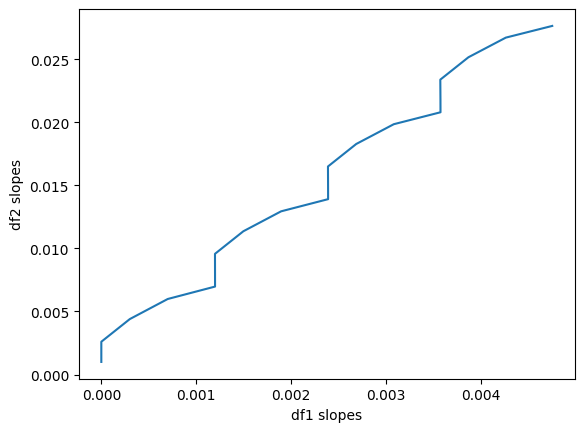

In [28]:
plt.plot(slope_arr, neg_slope_arr)
plt.xlabel("df1 slopes")
plt.ylabel("df2 slopes")
plt.show()

Plot the graph of slope(x-
axis) vs MSE (y-axis) for both case separately.

ValueError: x and y must have same first dimension, but have shapes (20,) and (8,)

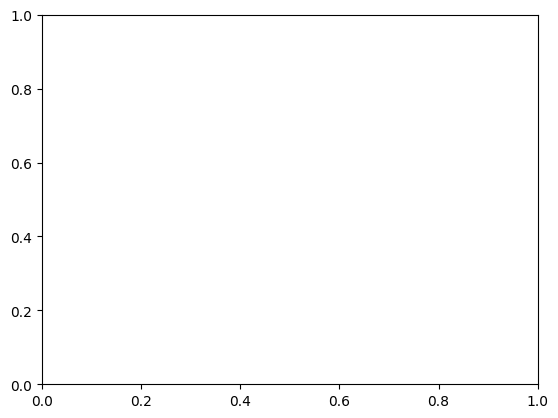

In [29]:
plt.plot(slope_arr, mse_arr)
plt.plot(neg_slope_arr, neg_mse_arr)
plt.show()

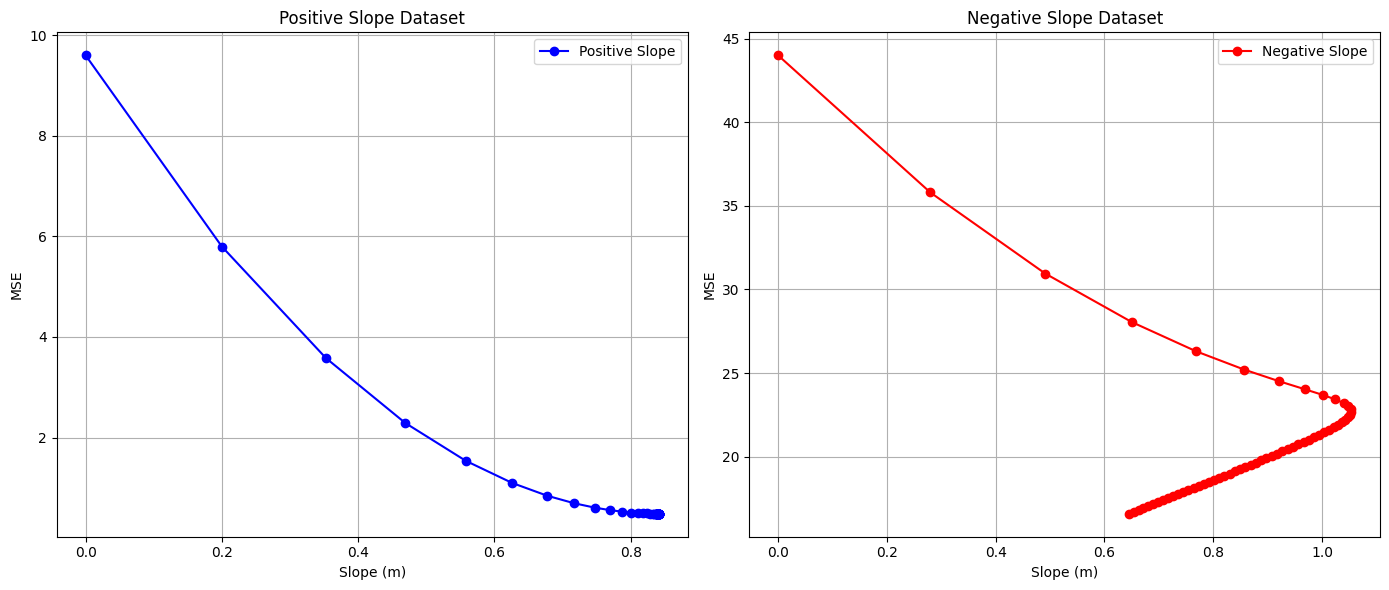

In [58]:
#### q5
import numpy as np
import matplotlib.pyplot as plt

# Positive slope dataset
x_pos = np.array([1, 2, 4, 3, 5])
y_pos = np.array([1, 3, 3, 2, 5])

# Negative slope dataset
x_neg = np.array([1, 2, 3, 4, 5])
y_neg = np.array([10, 8, 6, 4, 2])

# Function to perform gradient descent
def gradient_descent(x, y, learning_rate=0.01, iterations=60):
    m = 0  # Initial slope
    b = 0  # Initial intercept
    n = len(x)
    
    slopes = []  # To track slope values
    mse_values = []  # To track MSE values
    
    # Gradient Descent
    for _ in range(iterations):
        # Predicted values
        y_pred = m * x + b
        
        # Calculate MSE
        mse = np.mean((y - y_pred) ** 2)
        
        # Store slope and MSE for plotting
        slopes.append(m)
        mse_values.append(mse)
        
        # Calculate gradients
        m_gradient = (-2/n) * np.sum(x * (y - y_pred))
        b_gradient = (-2/n) * np.sum(y - y_pred)
        
        # Update parameters
        m -= learning_rate * m_gradient
        b -= learning_rate * b_gradient
    
    return slopes, mse_values

# Applying gradient descent to both datasets
slopes_pos, mse_pos = gradient_descent(x_pos, y_pos)
slopes_neg, mse_neg = gradient_descent(x_neg, y_neg)

# Plotting Positive Slope Data
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(slopes_pos, mse_pos, color='blue', marker='o', label='Positive Slope')
plt.xlabel('Slope (m)')
plt.ylabel('MSE')
plt.title('Positive Slope Dataset')
plt.grid(True)
plt.legend()

# Plotting Negative Slope Data
plt.subplot(1, 2, 2)
plt.plot(slopes_neg, mse_neg, color='red', marker='o', label='Negative Slope')
plt.xlabel('Slope (m)')
plt.ylabel('MSE')
plt.title('Negative Slope Dataset')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
